In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *

In [3]:
from words import *

In [4]:
MAX_LEN = 15

In [5]:
filepaths = get_filepaths('en', 'de', 'fr', 'it', 'sp')
df = read_data(filepaths)
df = filter_data(df, min_len=4, max_len=MAX_LEN, min_freq=5)
feats = extract_features(df)

In [6]:
df.head()

,word,freq,language
37,wurde,1463,deu
46,sich,1066,deu
47,eine,1049,deu
53,auch,662,deu
55,nach,653,deu


In [7]:
feats.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,language
37,w,u,r,d,e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deu
46,s,i,c,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deu
47,e,i,n,e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deu
53,a,u,c,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deu
55,n,a,c,h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,deu


In [8]:
data, y, _ = proc_df(feats, 'language')

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
37,23,21,18,4,5,0,0,0,0,0,0,0,0,0,0
46,19,9,3,8,0,0,0,0,0,0,0,0,0,0,0
47,5,9,14,5,0,0,0,0,0,0,0,0,0,0,0
53,1,21,3,8,0,0,0,0,0,0,0,0,0,0,0
55,14,1,3,8,0,0,0,0,0,0,0,0,0,0,0


In [10]:
y

array([0, 0, 0, ..., 3, 3, 3], dtype=int8)

In [11]:
b = np.zeros((len(y), 5))
b[np.arange(len(y)), y] = 1

In [12]:
b

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [13]:
data.shape

(20588, 15)

In [14]:
b.shape

(20588, 5)

In [15]:
n = data.shape[0]
val_idxs = np.random.choice(n, int(n * 0.2), replace=False)

In [16]:
PATH = 'data/words/'
md = ColumnarModelData.from_data_frame(PATH, val_idxs, data, b, cat_flds=list(range(MAX_LEN)), bs=128,
                                       is_reg=False, is_multi=True)

In [17]:
cat_sz = [(c, len(feats[c].cat.categories)+1) for c in list(range(MAX_LEN))]

In [18]:
cat_sz

[(0, 27),
 (1, 27),
 (2, 27),
 (3, 27),
 (4, 27),
 (5, 27),
 (6, 27),
 (7, 27),
 (8, 27),
 (9, 27),
 (10, 27),
 (11, 22),
 (12, 20),
 (13, 18),
 (14, 12)]

In [19]:
emb_szs = [(c, 1) for _,c in cat_sz]

In [20]:
learn = md.get_learner(emb_szs, 0, 0.04, 5, [1000,500], [0.001,0.01])

In [21]:
learn.lr_find()

  8%|▊         | 10/129 [00:00<00:02, 43.02it/s, loss=0.801]

/home/quentin/.virtualenvs/fastai/lib/python3.7/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


 81%|████████▏ | 105/129 [00:01<00:00, 53.44it/s, loss=1.55]


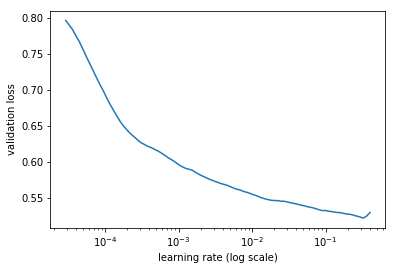

In [22]:
learn.sched.plot()

In [23]:
def acc(y_pred, targ):
    return np.array(y_pred.argmax(1) == targ.argmax(1)).mean()

In [25]:
learn.fit(0.1, 10, metrics=[acc])

epoch      trn_loss   val_loss   acc                         
    0      0.483061   0.444336   0.368472  
    1      0.452525   0.44992    0.351955                    
    2      0.451864   0.442332   0.369201                    
    3      0.449778   0.434598   0.380131                    
    4      0.486615   0.489019   0.29026                     
    5      0.481196   0.477532   0.298275                    
    6      0.475676   0.474265   0.324022                    
    7      0.478132   0.500338   0.299004                    
    8      0.513635   0.503051   0.207675                    
    9      0.576351   0.498859   0.224192                    


[0.4988593527319248, 0.22419237308719941]